In [1]:
## Update sklearn to prevent version mismatches:
!pip install sklearn --upgrade

In [2]:
## Install joblib (to save model): 
## *Restart your kernel after installing 
!pip install joblib

In [3]:
## Dependencies
import numpy as np
import pandas as pd

## Read CSV & Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("../a_Resources/Data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
print(f"Shape: {df.shape}")
df.head(10)

Shape: (6991, 41)


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


In [5]:
## DataFrame Exploration
# df.iloc[:,0:10].head(10)

## Set Target & Features

In [6]:
target = df['koi_disposition']
target.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [7]:
features = df.drop(columns=['koi_disposition'])
print(f"Features: {len(features.columns)}")

Features: 40


## Train / Test Split

In [8]:
## Train / Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [9]:
## Check split
print(f"Train: {round(len(y_train)/len(target)*100, 2)}%")
print(f"Test: {round(len(y_test)/len(target)*100, 2)}%")

Train: 75.0%
Test: 25.0%


## Pre-processing

In [10]:
## Encode Target
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

## Label encoding
label_encoder = LabelEncoder()
label_encoder.fit(target)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [11]:
## Target names
target_names = label_encoder.inverse_transform([0, 1, 2])
target_names

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [12]:
## Scale Features
from sklearn.preprocessing import MinMaxScaler

## Create MinMaxScaler model & Fit to training data
X_scaler = MinMaxScaler().fit(X_train)

## Transform training & testing data using X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train Preliminar Model

In [13]:
## Define model: Decision Tree Classifier
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [14]:
## Fit model
model.fit(X_train_scaled, y_train_encoded)

DecisionTreeClassifier()

In [15]:
print(f"Training Data Score: {round(model.score(X_train_scaled, y_train_encoded)*100,4)}%")
print(f"Testing Data Score: {round(model.score(X_test_scaled, y_test_encoded)*100,4)}%")

Training Data Score: 100.0%
Testing Data Score: 85.4119%


In [16]:
## Classification Report
from sklearn.metrics import classification_report
predictions = model.predict(X_test_scaled)
print(classification_report(y_test_encoded, predictions, target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.71      0.71      0.71       411
     CONFIRMED       0.74      0.75      0.75       484
FALSE POSITIVE       0.98      0.98      0.98       853

      accuracy                           0.85      1748
     macro avg       0.81      0.81      0.81      1748
  weighted avg       0.85      0.85      0.85      1748



## Feature Selection

In [17]:
## Model Feature Importances
model.feature_importances_

array([0.1949848 , 0.17331824, 0.18322372, 0.02983544, 0.00910445,
       0.00691638, 0.00152271, 0.01615378, 0.00534794, 0.01015317,
       0.02512953, 0.00979707, 0.0055418 , 0.01027296, 0.0093756 ,
       0.00356914, 0.00487138, 0.00320415, 0.01267186, 0.01216411,
       0.0070871 , 0.00741452, 0.00498945, 0.00480294, 0.00800739,
       0.0024949 , 0.13412026, 0.00329145, 0.0084899 , 0.01144486,
       0.00959646, 0.00167227, 0.00442698, 0.00885316, 0.00344555,
       0.01377538, 0.00657451, 0.0106935 , 0.01657708, 0.00508409])

In [18]:
## Criteria: Remove features with less than 1% 
selector = (model.feature_importances_ >= .01)

In [19]:
selected_features = features.loc[:, selector]
print(f"Shape: {selected_features.shape}")
selected_features.columns

Shape: (6991, 15)


Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_time0bk', 'koi_time0bk_err2', 'koi_impact', 'koi_duration',
       'koi_depth_err2', 'koi_prad', 'koi_model_snr', 'koi_steff_err1',
       'koi_srad_err1', 'ra', 'dec'],
      dtype='object')

In [20]:
print(f"Selected Features: {len(selected_features.columns)}")

Selected Features: 15


## Train Selected Features Model

In [21]:
## Train / Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

## Create MinMaxScaler model & Fit to training data
X_scaler = MinMaxScaler().fit(X_train)

## Transform training & testing data using X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Filtered model
filtered_model = tree.DecisionTreeClassifier()
## Fit model
filtered_model.fit(X_train_scaled, y_train_encoded)

DecisionTreeClassifier()

In [22]:
## Model Train / Test Score
print(f"Training Data Score: {round(filtered_model.score(X_train_scaled, y_train_encoded)*100,4)}%")
print(f"Testing Data Score: {round(filtered_model.score(X_test_scaled, y_test_encoded)*100,4)}%")

Training Data Score: 100.0%
Testing Data Score: 84.1533%


In [23]:
## Classification Report
from sklearn.metrics import classification_report
predictions = filtered_model.predict(X_test_scaled)
print(classification_report(y_test_encoded, predictions, target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.68      0.69      0.69       411
     CONFIRMED       0.73      0.72      0.73       484
FALSE POSITIVE       0.98      0.98      0.98       853

      accuracy                           0.84      1748
     macro avg       0.80      0.80      0.80      1748
  weighted avg       0.84      0.84      0.84      1748



## Model Tuning (Hyperparameters)

In [24]:
## Get list of available parameters
filtered_model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [25]:
## Create GridSearchCV model
from sklearn.model_selection import GridSearchCV

## Parameters grid reference:
## https://medium.com/analytics-vidhya/decisiontree-classifier-working-on-moons-dataset-using-gridsearchcv-to-find-best-hyperparameters-ede24a06b489
param_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid = GridSearchCV(filtered_model, param_grid, verbose=3)

In [26]:
## Train model using GridSearch
grid.fit(X_train_scaled, y_train_encoded)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV 1/5] END ..........max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV 2/5] END ..........max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV 3/5] END ..........max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV 4/5] END ..........max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV 5/5] END ..........max_leaf_nodes=2, min_samples_split=2; total time=   0.0s
[CV 1/5] END ..........max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV 2/5] END ..........max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV 3/5] END ..........max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV 4/5] END ..........max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV 5/5] END ..........max_leaf_nodes=2, min_samples_split=3; total time=   0.0s
[CV 1/5] END ..........max_leaf_nodes=2, min_samples_split=4; total time=   0.0s
[CV 2/5] END ..........max_leaf_nodes=2, min_

[CV 1/5] END ..........max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV 2/5] END ..........max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV 3/5] END ..........max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV 4/5] END ..........max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV 5/5] END ..........max_leaf_nodes=9, min_samples_split=2; total time=   0.0s
[CV 1/5] END ..........max_leaf_nodes=9, min_samples_split=3; total time=   0.0s
[CV 2/5] END ..........max_leaf_nodes=9, min_samples_split=3; total time=   0.0s
[CV 3/5] END ..........max_leaf_nodes=9, min_samples_split=3; total time=   0.0s
[CV 4/5] END ..........max_leaf_nodes=9, min_samples_split=3; total time=   0.0s
[CV 5/5] END ..........max_leaf_nodes=9, min_samples_split=3; total time=   0.0s
[CV 1/5] END ..........max_leaf_nodes=9, min_samples_split=4; total time=   0.0s
[CV 2/5] END ..........max_leaf_nodes=9, min_samples_split=4; total time=   0.0s
[CV 3/5] END ..........max_l

[CV 3/5] END .........max_leaf_nodes=15, min_samples_split=4; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=15, min_samples_split=4; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=15, min_samples_split=4; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=16, min_samples_split=2; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=16, min_samples_split=2; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=16, min_samples_split=2; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=16, min_samples_split=2; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=16, min_samples_split=2; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=16, min_samples_split=3; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=16, min_samples_split=3; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=16, min_samples_split=3; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=16, min_samples_split=3; total time=   0.0s
[CV 5/5] END .........max_le

[CV 5/5] END .........max_leaf_nodes=22, min_samples_split=3; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=22, min_samples_split=4; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=22, min_samples_split=4; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=22, min_samples_split=4; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=22, min_samples_split=4; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=22, min_samples_split=4; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=23, min_samples_split=2; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=23, min_samples_split=2; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=23, min_samples_split=2; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=23, min_samples_split=2; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=23, min_samples_split=2; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=23, min_samples_split=3; total time=   0.0s
[CV 2/5] END .........max_le

[CV 2/5] END .........max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=29, min_samples_split=3; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=29, min_samples_split=4; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=30, min_samples_split=2; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=30, min_samples_split=2; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=30, min_samples_split=2; total time=   0.0s
[CV 4/5] END .........max_le

[CV 1/5] END .........max_leaf_nodes=36, min_samples_split=3; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=36, min_samples_split=3; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=36, min_samples_split=3; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=36, min_samples_split=3; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=36, min_samples_split=3; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=36, min_samples_split=4; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=36, min_samples_split=4; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=36, min_samples_split=4; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=36, min_samples_split=4; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=36, min_samples_split=4; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=37, min_samples_split=2; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=37, min_samples_split=2; total time=   0.0s
[CV 3/5] END .........max_le

[CV 1/5] END .........max_leaf_nodes=43, min_samples_split=3; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=43, min_samples_split=3; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=43, min_samples_split=3; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=43, min_samples_split=3; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=43, min_samples_split=3; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=43, min_samples_split=4; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=43, min_samples_split=4; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=43, min_samples_split=4; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=43, min_samples_split=4; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=43, min_samples_split=4; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=44, min_samples_split=2; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=44, min_samples_split=2; total time=   0.0s
[CV 3/5] END .........max_le

[CV 4/5] END .........max_leaf_nodes=50, min_samples_split=2; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=50, min_samples_split=2; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=50, min_samples_split=3; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=50, min_samples_split=4; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=50, min_samples_split=4; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=50, min_samples_split=4; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=50, min_samples_split=4; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=50, min_samples_split=4; total time=   0.0s
[CV 1/5] END .........max_le

[CV 3/5] END .........max_leaf_nodes=57, min_samples_split=3; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=57, min_samples_split=3; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=57, min_samples_split=3; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=57, min_samples_split=4; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=57, min_samples_split=4; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=57, min_samples_split=4; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=57, min_samples_split=4; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=57, min_samples_split=4; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=58, min_samples_split=2; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=58, min_samples_split=2; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=58, min_samples_split=2; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=58, min_samples_split=2; total time=   0.0s
[CV 5/5] END .........max_le

[CV 1/5] END .........max_leaf_nodes=64, min_samples_split=4; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=64, min_samples_split=4; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=64, min_samples_split=4; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=64, min_samples_split=4; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=64, min_samples_split=4; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=65, min_samples_split=2; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=65, min_samples_split=2; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=65, min_samples_split=2; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=65, min_samples_split=2; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=65, min_samples_split=2; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=65, min_samples_split=3; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=65, min_samples_split=3; total time=   0.0s
[CV 3/5] END .........max_le

[CV 4/5] END .........max_leaf_nodes=71, min_samples_split=4; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=71, min_samples_split=4; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=72, min_samples_split=2; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=72, min_samples_split=2; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=72, min_samples_split=2; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=72, min_samples_split=2; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=72, min_samples_split=2; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=72, min_samples_split=3; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=72, min_samples_split=3; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=72, min_samples_split=3; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=72, min_samples_split=3; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=72, min_samples_split=3; total time=   0.0s
[CV 1/5] END .........max_le

[CV 1/5] END .........max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=79, min_samples_split=2; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=79, min_samples_split=3; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=79, min_samples_split=4; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=79, min_samples_split=4; total time=   0.0s
[CV 3/5] END .........max_le

[CV 2/5] END .........max_leaf_nodes=86, min_samples_split=2; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=86, min_samples_split=2; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=86, min_samples_split=2; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=86, min_samples_split=2; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=86, min_samples_split=3; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=86, min_samples_split=3; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=86, min_samples_split=3; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=86, min_samples_split=3; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=86, min_samples_split=3; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=86, min_samples_split=4; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=86, min_samples_split=4; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=86, min_samples_split=4; total time=   0.0s
[CV 4/5] END .........max_le

[CV 3/5] END .........max_leaf_nodes=93, min_samples_split=2; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=93, min_samples_split=2; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=93, min_samples_split=2; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=93, min_samples_split=3; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=93, min_samples_split=3; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=93, min_samples_split=3; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=93, min_samples_split=3; total time=   0.0s
[CV 5/5] END .........max_leaf_nodes=93, min_samples_split=3; total time=   0.0s
[CV 1/5] END .........max_leaf_nodes=93, min_samples_split=4; total time=   0.0s
[CV 2/5] END .........max_leaf_nodes=93, min_samples_split=4; total time=   0.0s
[CV 3/5] END .........max_leaf_nodes=93, min_samples_split=4; total time=   0.0s
[CV 4/5] END .........max_leaf_nodes=93, min_samples_split=4; total time=   0.0s
[CV 5/5] END .........max_le

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=3)

In [27]:
print(f"Tuned Parameters: {grid.best_params_}")
print(f"Tuned Score: {round((grid.best_score_)*100,4)}%")

Tuned Parameters: {'max_leaf_nodes': 14, 'min_samples_split': 2}
Tuned Score: 88.1362%


## Train Tuned Model

In [28]:
## Tuned model
tuned_model = tree.DecisionTreeClassifier(**grid.best_params_)

## Fit model
tuned_model.fit(X_train_scaled, y_train_encoded)

DecisionTreeClassifier(max_leaf_nodes=14)

In [29]:
## Model Train / Test Score
print(f"Training Data Score: {round(tuned_model.score(X_train_scaled, y_train_encoded)*100,4)}%")
print(f"Testing Data Score: {round(tuned_model.score(X_test_scaled, y_test_encoded)*100,4)}%")

Training Data Score: 88.9567%
Testing Data Score: 88.5584%


In [30]:
## Classification Report
from sklearn.metrics import classification_report

predictions = tuned_model.predict(X_test_scaled)
print(classification_report(y_test_encoded, predictions, target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.68      0.75       411
     CONFIRMED       0.77      0.87      0.82       484
FALSE POSITIVE       0.98      0.99      0.99       853

      accuracy                           0.89      1748
     macro avg       0.86      0.85      0.85      1748
  weighted avg       0.89      0.89      0.88      1748



## Plot Decision Tree

[Text(227.18571428571428, 206.56799999999998, 'X[1] <= 0.5\ngini = 0.622\nsamples = 5243\nvalue = [1276, 1316, 2651]'),
 Text(203.27142857142857, 184.824, 'X[0] <= 0.5\ngini = 0.666\nsamples = 3951\nvalue = [1260, 1299, 1392]'),
 Text(179.35714285714286, 163.07999999999998, 'X[2] <= 0.5\ngini = 0.633\nsamples = 3117\nvalue = [1260, 1287, 570]'),
 Text(155.44285714285715, 141.336, 'X[10] <= 0.002\ngini = 0.524\nsamples = 2608\nvalue = [1260, 1283, 65]'),
 Text(71.74285714285715, 119.592, 'X[3] <= 0.5\ngini = 0.312\nsamples = 996\nvalue = [812, 147, 37]'),
 Text(47.82857142857143, 97.848, 'X[10] <= 0.001\ngini = 0.266\nsamples = 963\nvalue = [812, 147, 4]'),
 Text(23.914285714285715, 76.10399999999998, 'gini = 0.079\nsamples = 559\nvalue = [536, 22, 1]'),
 Text(71.74285714285715, 76.10399999999998, 'X[11] <= 0.172\ngini = 0.437\nsamples = 404\nvalue = [276, 125, 3]'),
 Text(47.82857142857143, 54.360000000000014, 'gini = 0.491\nsamples = 185\nvalue = [105, 80, 0]'),
 Text(95.6571428571428

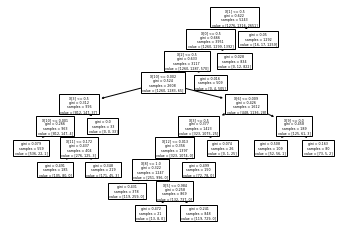

In [31]:
## Plot decision tree
tree.plot_tree(tuned_model)

In [32]:
## Export tuned tree to *.dot file using GraphViz
from sklearn.tree import export_graphviz

export_graphviz(tuned_model, out_file='decision_tree.dot', feature_names=None, class_names=None, filled=True)

## Save Tuned Model

In [33]:
## Save if tuned_model is best model overall
import joblib
filename = 'decision_tree.sav'
joblib.dump(tuned_model, filename)

['decision_tree.sav']